### Analysis and Quantificatioin of Mass Shooting Events

In this project, we will use the Mother Jones Database on mass shootings in order to answer the following questions: is there an individual more likely to commit one of these crimes, where are these events most likely to happen and is there a place with higher casualties, and how many of these events had preventable lead ups? 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('fivethirtyeight')
%matplotlib inline



### Cleaning the Data

Our first step is to remove inconsistantcies within the data so that it can be standardized across itself. This will include standardizing the race, gender, mental health issues, and age columns

In [5]:
shootings=pd.read_csv("Mother Jones - Mass Shootings Database, 1982 - 2019 - Sheet1.csv")

In [6]:
print(list(shootings.columns.values))

['case', 'location', 'date', 'summary', 'fatalities', 'injured', 'total_victims', 'location.1', 'age_of_shooter', 'prior_signs_mental_health_issues', 'mental_health_details', 'weapons_obtained_legally', 'where_obtained', 'weapon_type', 'weapon_details', 'race', 'gender', 'sources', 'mental_health_sources', 'sources_additional_age', 'latitude', 'longitude', 'type', 'year']


In [7]:
shootings['race']=shootings['race'].str.upper()

shootings['race']=shootings['race'].str.replace('-', 'UNCLEAR')
shootings['race']=shootings['race'].str.replace('WHITE ', 'WHITE')
shootings['race'].value_counts()


WHITE              65
BLACK              19
LATINO             10
ASIAN               8
UNCLEAR             5
OTHER               5
NATIVE AMERICAN     3
Name: race, dtype: int64

In [8]:
shootings['prior_signs_mental_health_issues']=shootings['prior_signs_mental_health_issues'].str.replace('-', 'Unclear').str.replace('Unknown', 'Unclear').str.replace('Unclear ', 'Unclear')
        
shootings['prior_signs_mental_health_issues'].value_counts()

Yes        58
Unclear    34
No         17
TBD         5
yes         1
Name: prior_signs_mental_health_issues, dtype: int64

In [9]:
shootings['gender']=shootings['gender'].str.replace('Male', 'M').str.replace('Female', 'F').str.replace('M', 'Male').str.replace('F', 'Female')
shootings['gender'].value_counts()

Male             111
Female             3
Male & Female      1
Name: gender, dtype: int64

After a preliminary look at the data, we can start our search for the most likely individual by examing the race, gender, age and prior_signs_mental_health_issues. This can help us build a profile of the most common perpatrators.

[Text(0, 0, 'Male'), Text(0, 0, 'Female'), Text(0, 0, 'Male & Female')]

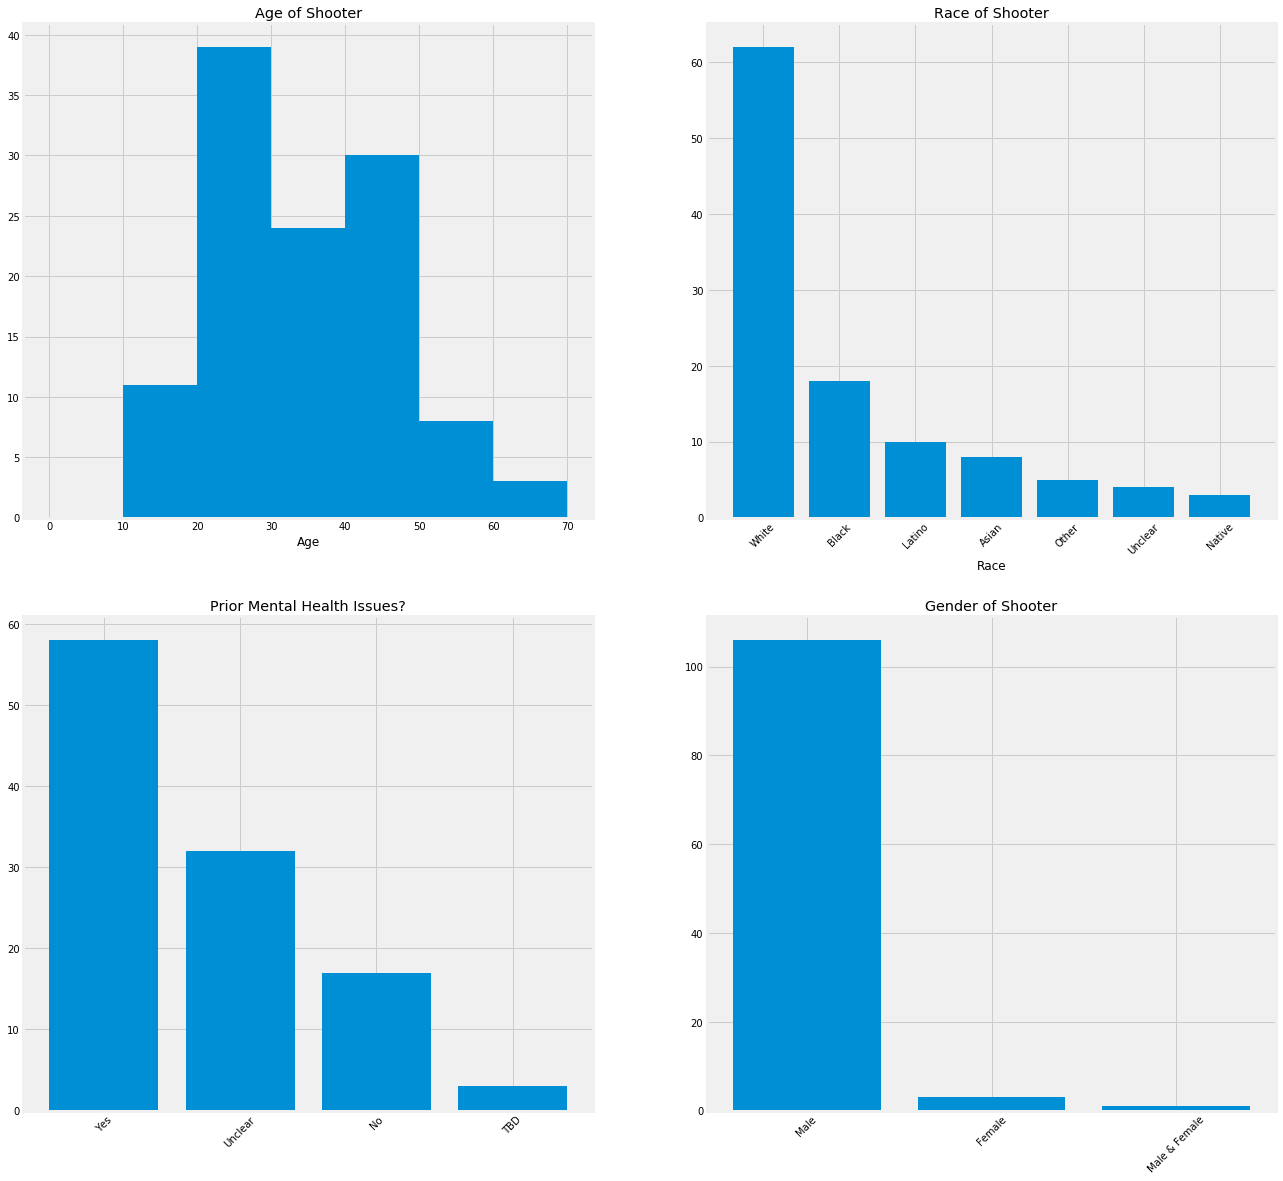

In [25]:
fig= plt.figure(figsize=(20,20))
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)
ax3=plt.subplot(2,2,3)
ax4=plt.subplot(2,2,4)

ax1.hist(shootings['age_of_shooter'], bins=7, range=(0,70))
ax1.set_title('Age of Shooter')
ax1.set_xlabel('Age')

race=shootings['race'].value_counts()
x=['White', 'Black', 'Latino', 'Asian', 'Other', 'Unclear', 'Native']
y=[62, 18, 10, 8, 5, 4, 3]
ax2.bar(x, y)
ax2.set_title('Race of Shooter') #later, plot against proportions of US.
ax2.set_xlabel('Race')
ax2.set_xticklabels(x, rotation=45)

x2=['Yes', 'Unclear', 'No', 'TBD']
y2=[58,32,17,3]
ax3.bar(x2, y2)
ax3.set_title('Prior Mental Health Issues?')
ax3.set_xticklabels(x2, rotation=45)

x1=['Male', 'Female', 'Male & Female']
y1=[106, 3, 1]
ax4.bar(x1, y1)
ax4.set_title('Gender of Shooter')

ax4.set_xticklabels(x1, rotation=45)

From the graphs we see that white males between 20 and 50 with mental health concerns are our most likely shooter. However, we must remember that this is a sample of the population and we should compare racal frequencies with the US census frequency in order to see if the proportion of whites is disproportionate to the race. We do not complete this further analysis on gender or mental health since they are clearly not inline with what is expected stastically. 

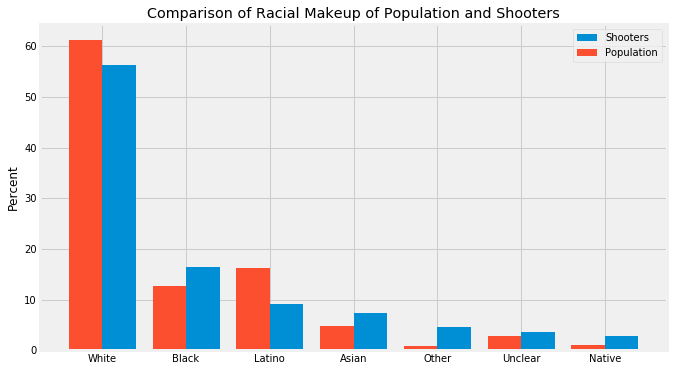

In [24]:
fig, ax2=plt.subplots(figsize=(10,6))

x=['White', 'Black', 'Latino', 'Asian', 'Other', 'Unclear', 'Native']
y=[56.3636, 16.3636, 9.0909, 7.2727, 4.5455, 3.6364, 2.7273]
pop_y=[61.3, 12.7, 16.3, 4.8,.9 , 2.9, 1.1]

index=np.arange(7)
bar_width=.35



shooters=plt.bar( x, y, .4, label='Shooters', align='edge')

pop=plt.bar( x, pop_y,-.4,  label='Population', align='edge' )

plt.ylabel('Percent')
plt.title('Comparison of Racial Makeup of Population and Shooters')
plt.legend(['Shooters', 'Population'])



We see from this that the proportianalityies are only slgihtly off. We need to perform more analysis in order to find out if this difference is statistically significant. To do this we present the null hypothesis: the demographic differences in the shooters will mirror that of the nation. 

In [12]:

percent_shoot=[56.3636, 16.3636, 9.0909, 7.2727, 4.5455, 3.6364, 2.7273]
percent_pop=[61.3, 12.7, 16.3, 4.8,.9 , 2.9, 1.1]

def trans(listed):
    change=[]
    for item in listed:
        new=item*110/100
        change.append(new)
    return change
 
expected=trans(percent_pop)
observed=trans(percent_shoot)
    
chisq_value, pvalue_shooter = chisquare(observed, expected)

print(pvalue_shooter)

0.00026369967762215744


We attained a p-value of .000263 which means we reject the null hypothesis. This tells us that race doesn't just align with the national demographics. Other races and Asians both have disproportionatly high contribution compared to their population demographics.

From these analyses we see that the most meaningful predictors of who will commit a mass shooting are gender and history of mental health, and minority status as an unidentified race or Asian.  

We now look at where these events are most likely to occur. We will start with the large picture and view the country as a map and see what conclusions we can draw. Then we will look to the catagorizations given in the data set to see if a trend emerges.

"\n\n#new\nfig=plt.figure(figsize=(25,25))\nm = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,\n        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)\nm.drawcoastlines()\nm.drawcountries()\nm.drawlsmask()\nm.drawstates()\nlatitudes=shootings['latitude'].tolist()\nlongitudes=shootings['longitude'].tolist()\n\ncasual=shootings['total_victims'].tolist()\n\nax=Axes3d(fig)\n\nax.set_axis_off()\nax.azim = 270\nax.dist = 7\n\nx,y=m(longitudes, latitudes)\n"

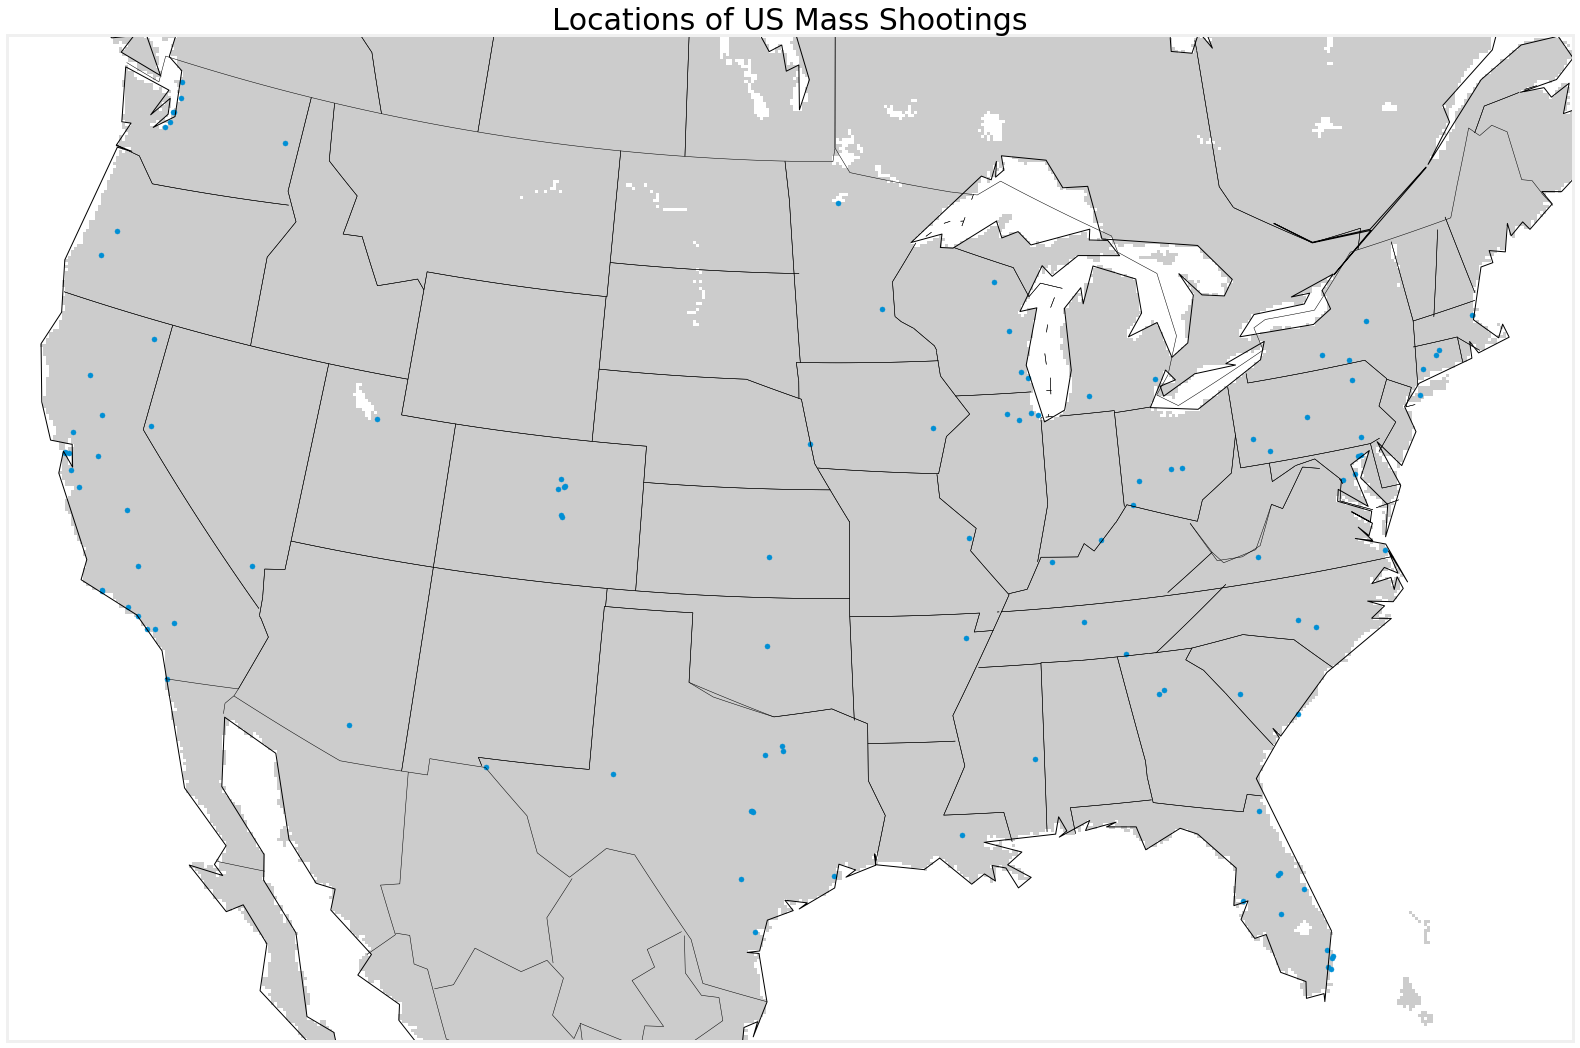

In [30]:


fig=plt.figure(figsize=(25,25))

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawcoastlines()
m.drawcountries()
m.drawlsmask()
m.drawstates()
latitudes=shootings['latitude'].tolist()
longitudes=shootings['longitude'].tolist()



x,y=m(longitudes, latitudes)
plt.scatter(x,y,s=25)
plt.title('Locations of US Mass Shootings', fontsize=30)
'''

#new
fig=plt.figure(figsize=(25,25))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawcoastlines()
m.drawcountries()
m.drawlsmask()
m.drawstates()
latitudes=shootings['latitude'].tolist()
longitudes=shootings['longitude'].tolist()

casual=shootings['total_victims'].tolist()

ax=Axes3d(fig)

ax.set_axis_off()
ax.azim = 270
ax.dist = 7

x,y=m(longitudes, latitudes)
'''

From the map above no clear trends emerge. On thing to look at would be to correlate the cities given in the data to the given populations using an API in order to see if there is a correlation between number killed and population density of the city or distance to a major metro area. (Note for future, find a way t cleanly represent deaths and injuries for the shootings themselves to give a sense of scale)


Now we look at the coded location in which the shooting happend to see if one area in particular would be more apparent. And if there are any correlations between the top areas. 


In [ ]:
shootings['location.1'].value_counts()

In [ ]:
shootings['location.1']=shootings['location.1'].str.replace('\n', '')

In [ ]:
shootings['location.1'].value_counts().plot(kind='barh')
plt.title('Frequency of Mass Shootings by Area')
plt.xlabel('Frequency')


As we can see from the table, the most likely (exluding other due to its broad nature) is the workplace followed by school. This makes sense as it is a place where the disgruntled goes regularly and interacts with people who they may develop negative feelings towards. The idea that these attacks are targeted based on negative feelilngs includes the religious catagory since extremism towards religion is present in the country.

In [14]:
shootings['casualties']=shootings['injured']+shootings['fatalities']

In [15]:
short=shootings[['location.1', 'casualties']]


In [16]:
freq=shootings.groupby('location.1')['casualties'].sum().sort_values() 

Text(0.5, 1.0, 'Total Casualties Based on Locations')

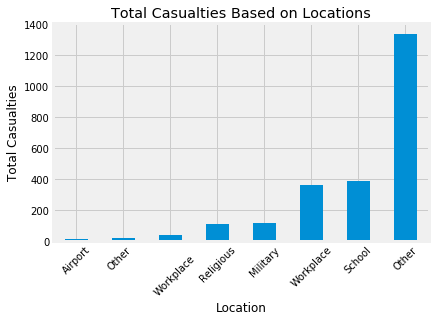

In [17]:
freq.plot('bar')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Total Casualties')
plt.title('Total Casualties Based on Locations')

We will now see if one particular area has a higher than average casualty count and see if there is an explanation for this.

In [18]:
shootings['location.1']=shootings['location.1'].str.replace('\n', '')

avgs=shootings.groupby('location.1')['casualties'].mean().sort_values() 
shootings['location.1'].value_counts()

Other        48
Workplace    38
School       17
Religious     6
Military      5
Airport       1
Name: location.1, dtype: int64

We can find the expected proportions of shootings in each locations by finding the mean of a single shooting and multiplying that by the number of occurances in that area. We test this using the chi-squared test. Our null hypothesis is that the numbers seen are within the expected values meaning that no one area is more lethal than another. 

In [19]:
average_per=shootings['casualties'].mean()
observed_per=shootings.groupby('location.1')['casualties'].sum().sort_values()
print(observed_per)

def expected(listed):
    empty=[]
    for item in listed:
        new=item*average_per
        empty.append(new)
    return empty

expected_per=expected([45, 36, 17, 6, 5, 1])

observed_per=[1275, 334, 383, 109, 113, 11]

chisq_value_per, pvalue_location = chisquare(observed_per, expected_per)
print(pvalue_location)

location.1
Airport        11
Religious     109
Military      113
School        383
Workplace     398
Other        1358
Name: casualties, dtype: int64
1.2856675617782078e-76


We see from the above table that average has the highest average casualty. This could be because shooters select these locations specifically in order to generate more damage over all. But we see that a p-value of 0; this means we reject the null hypothesis that all areas have proportional casualties. Looking at the averages we see that Other is grossly disproportionate to it's expected amount.  

The final step in our analysis is to see if there was a preventable lead up. We will quantify this as somebody who has a history of mental health issues buying a firearm legally. For the sake of simplicity, we will lump the possibilities into 3 catagories: Yes, No, unknown/TBD since the primary interest is in the overlap of yes and mental health issues.

In [20]:
shootings['weapons_obtained_legally'].value_counts()

Yes                                                                                                                                    79
No                                                                                                                                     16
TBD                                                                                                                                     7
Unknown                                                                                                                                 6
-                                                                                                                                       2
\nYes                                                                                                                                   2
Yes ("some of the weapons were purchased legally and some of them may not have been")                                                   1
Yes                               

In [21]:
legal=shootings[shootings['weapons_obtained_legally'].str.upper().str.contains('YES')]

In [22]:
legal_mental=legal[legal['prior_signs_mental_health_issues']=="Yes"]

In [23]:
legal_mental.shape[0]

45

We see that 45 of the 110 mass shooting events had an instance where somebody with prior mental health issues purchased a fire arm legally. This means that 41% of these events could be viewed as somewhat preventable with red flag laws. To the argument that the same weapons could've been obtained illegally, this is true. However, obtaining firearms illegally is one step in the process where the offenders could've been caught and the event avoided. 